In [1]:
%matplotlib inline

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
import numpy as np

# Chapter 1

## Trends

In [ ]:
trends = pd.read_csv('../data/dl_trends.csv', index_col=0)
trends = trends.apply(lambda x: x/x.max())


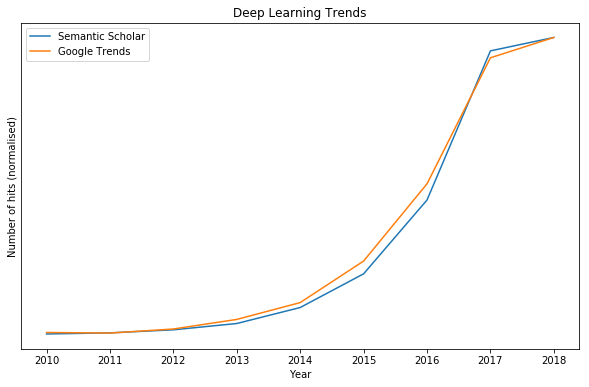

In [39]:
p = trends.plot(title = 'Deep Learning Trends', figsize=(10,6))
p.set_ylabel('Number of hits (normalised)')
p.tick_params(axis='y', which='both', left=False, labelleft=False)
plt.savefig('../writing/figures/trends.pdf', bbox_inches='tight')

In [40]:
adult = pd.read_csv('../data/adult.csv')

In [45]:
adult_sample = adult.loc[:5,['age','occupation', 'education', 'race', 'sex', '>=50k']]

In [46]:
adult_sample.to_csv('../data/adult_sample.csv', index=None)

# Chapter 2

In [117]:
def f1(x):
    return x**2

def f2(x):
    return -x**2 + 40*x

In [129]:
x11 = np.arange(-18,18,0.5)
x12 = f1(x11)

x21 = np.arange(2,38,0.5)
x22 = f2(x21)

In [130]:
x1 = np.concatenate([x11, x21])

In [131]:
x2 = np.concatenate([x12, x22])

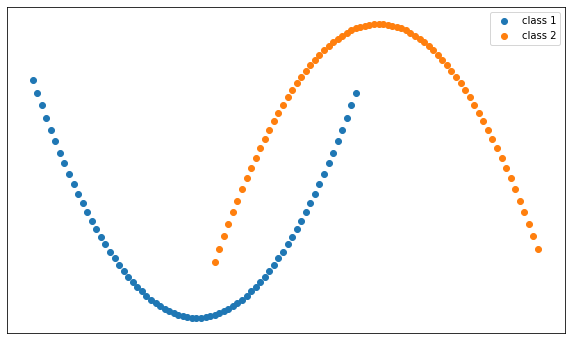

In [136]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x11, x12, label='class 1')
ax.scatter(x21, x22, label='class 2')
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.legend()
plt.savefig('../writing/figures/simple_dataset.pdf')

# Chapeter 6

## Cross-validation

In [4]:
from sklearn.model_selection import KFold

In [5]:
kf = KFold(5)

In [19]:
np.array(range(20)).shape

(20,)

In [20]:
next(iter(kf.split(np.array(range(20)))))

(array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
 array([0, 1, 2, 3]))

In [63]:
def plot_cv_indices(cv, X, ax, n_splits, lw=10):
    for ii, (tr, tt) in enumerate(cv.split(X=X)):
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        ax.scatter(range(len(indices)), [ii + .5] * len(indices),
                   c=indices, marker='_', lw=lw, cmap=plt.cm.coolwarm,
                   vmin=-.2, vmax=1.2)

    yticklabels = np.arange(1,n_splits+1)
    ax.set(yticks=np.arange(n_splits+2) + .5, yticklabels=yticklabels,
           xlabel='Sample index', ylabel="CV iteration",
           ylim=[n_splits+.2, -.2], xlim=[0, 100])
    ax.set_title('5-fold Cross-Validation', fontsize=15)
    return ax

In [69]:
import matplotlib.patches as mpatches

In [74]:
hand = [mpatches.Patch(color=plt.cm.coolwarm(i+.2), label=sub) for i,sub in enumerate(['train', 'test'])]

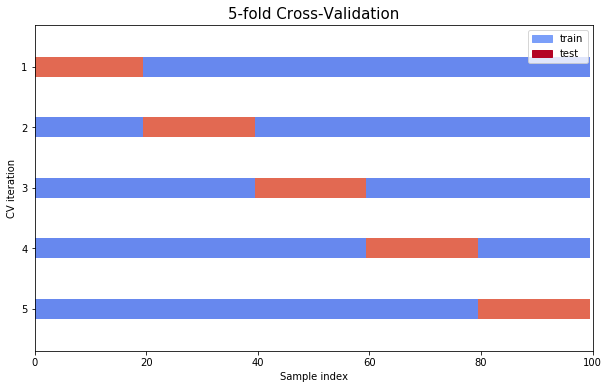

In [76]:
fig, ax = plt.subplots(figsize=(10,6))
plot_cv_indices(kf, np.array(range(100)), ax, 5, lw=20)
ax.legend(handles=hand)
plt.savefig('../writing/figures/cv.pdf', bbox_inches='tight')